# 목표 및 의의
## 1) 로이터 뉴스 데이터에 대해 이해해본다.
## 2) F1 score와 confusion matirx를 출력할 수 있다.
## 3) 머신러닝 모델에 따른, 단어장의 단어 개수에 따른 성능을 확인해본다.

In [1]:
from tensorflow.keras.datasets import reuters

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


2021-12-23 11:11:45.479124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-23 11:11:45.479259: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test,y_test) = reuters.load_data(num_words=10000, test_split=0.2)


In [3]:
print(f'훈련 샘플의 수: {len(x_train)}')
print(f'훈련 테스트의 수: {len(x_test)}')


훈련 샘플의 수: 8982
훈련 테스트의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0],y_test[0])

3 3


In [6]:
num_classes = max(y_train)+1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 각각 데이터의 길이를 50을 기본단위로 끊어서 히스토그램을 그려보겠습니다.

훈련용 뉴스의 최대 길이 : 2376
평균길이 : 145.5398574927633


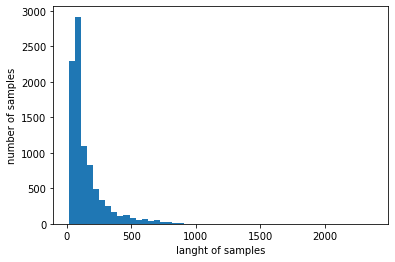

In [7]:
print('훈련용 뉴스의 최대 길이 : {}'.format(max(len(i) for i in x_train)))
print('평균길이 : {}'.format(sum(len(i) for i in x_train)/len(x_train)))

plt.hist([len(s) for s in x_train],bins=50)
plt.xlabel('langht of samples')
plt.ylabel('number of samples')
plt.show()

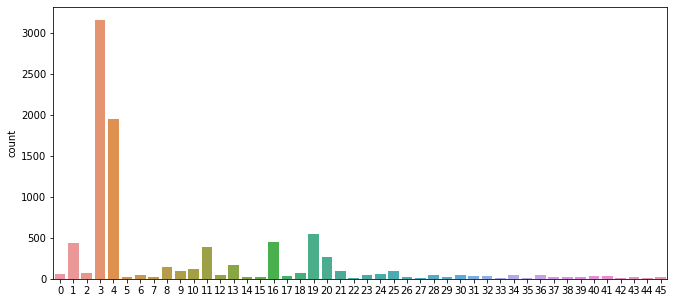

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

### 그래프 그리는 코드가 마냥 쉽지마는 않군요.

In [9]:
unique_elements, count_elements = np.unique(y_train,return_counts=True)
print("각 클래스 빈도수:")
for i in zip(unique_elements, count_elements):
    print(*i,end='\t')

각 클래스 빈도수:
0 55	1 432	2 74	3 3159	4 1949	5 17	6 48	7 16	8 139	9 101	10 124	11 390	12 49	13 172	14 26	15 20	16 444	17 39	18 66	19 549	20 269	21 100	22 15	23 41	24 62	25 92	26 24	27 15	28 48	29 19	30 45	31 39	32 32	33 11	34 50	35 10	36 49	37 19	38 19	39 24	40 36	41 30	42 13	43 21	44 12	45 18	

In [10]:
word_idx = reuters.get_word_index()
print('path="reuters_word_index"가 default로 되어있죠~')

path="reuters_word_index"가 default로 되어있죠~


In [11]:
word_idx['the']

1

In [12]:
word_idx['it']

13

### 여기서 the와 it은 실제로는 4, 16의 인덱스를 가지고 있지만, 3이 뺀만큼이 들어있습니다. 아마 Start, End, OOV 토큰 세개가 추가되어 있기때문이 아닐까요? 무튼 이건 로이터 뉴스 데이터가 정의한 일종의 약속이라고 합니다.

In [15]:
index2word = {index+3:word for word,index in word_idx.items()}


### 이렇게 하면 이제 위의 숫자로만 된 데이터를 원복 할 수 있습니다.

In [16]:
print(index2word[4], index2word[16])

the it


### 0번, 1번, 2번은 사실 각각 \<pad>, \<sos>, \<unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [17]:
index2word[0] = '<pad>'
index2word[1] = '<sos>'
index2word[2] = '<unk>'


In [18]:
print(' '.join(index2word[i] for i in x_train[0]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
print(' '.join(index2word[i] for i in [4, 587, 23, 133, 6, 30, 515]))

the transaction is expected to be completed


In [20]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index2word[j] for j in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [23]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index2word[j] for j in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [25]:
print(x_train[:1],x_test[:1])

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'] ['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital pro

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
print('이렇게 해야죠!')

이렇게 해야죠!


In [27]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [29]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


### 이제 사용할 라이브러리 들을 불러와보겠습니다.

### 나이브 베이지 분류기를 사용할 것입니다.

In [30]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB # 다항분포 나이브 베이즈 모델과 모르는 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score # 정확도 계산


In [31]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [32]:
# 테스트 데이터(텐서)를 DTM으로 만들어 줍니다.
x_test_dtm = dtmvector.transform(x_test)
# TF-IDF행렬로 변환합니다.
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

# 테스트 데이터를 예측합니다.
predicted = model.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6567230632235085
